In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_wine
wine_data = load_wine()

In [3]:
df = pd.DataFrame(data = wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 3 Data understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### Data preparation

In [5]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

### 4. Model Building

In [6]:
X  = df.drop(labels=['target'],axis = 1)
y = df[['target']]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=12, test_size=0.15, stratify=y)

In [8]:
X_train.shape, X_test.shape

((151, 13), (27, 13))

In [9]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix

#### k = 3

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.8518518518518519


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.8148148148148148


### model testing

In [12]:
y_pred = knn_classifier.predict(X_test)

### Model evalueation

In [13]:
print(accuracy_score(y_test,y_pred))


0.8148148148148148


### Data preparation

In [17]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)

In [18]:
df_2 = pd.DataFrame(data = scaled_X, columns=wine_data.feature_names )

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y, random_state=12, test_size=0.15, stratify=y)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.9629629629629629


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_train)
print(accuracy_score(y_train,y_pred))

0.9602649006622517


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_train)
print(accuracy_score(y_train,y_pred))

0.9801324503311258


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_train)
print(accuracy_score(y_train,y_pred))

0.9735099337748344


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_train)
print(accuracy_score(y_train,y_pred))

0.9668874172185431


In [26]:
from sklearn.model_selection import cross_val_score

In [34]:
cv_scres = []
for i in range(1,31,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(estimator=knn_model, X = scaled_X, y=y, cv =5)
    cv_scres.append(cross_val.mean())

In [35]:
cv_scres

[0.9495238095238095,
 0.943968253968254,
 0.9550793650793651,
 0.9665079365079364,
 0.9496825396825397,
 0.9552380952380952,
 0.9552380952380952,
 0.9607936507936508,
 0.9665079365079364,
 0.9607936507936508,
 0.9607936507936508,
 0.9607936507936508,
 0.9663492063492063,
 0.9663492063492063,
 0.9663492063492063]

### using visuals

In [36]:
import matplotlib.pyplot as plt

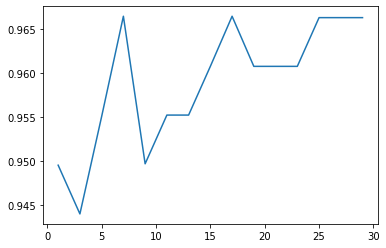

In [40]:
plt.plot(range(1,31,2),cv_scres)
plt.show()